In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import nltk

In [2]:
positive = pd.read_csv('positive.csv', sep=';', encoding='utf8', header=None)
positive = positive.rename(columns={3:'text'})
positive.head()

,0,1,2,text,4,5,6,7,8,9,10,11
0,408906692374446080,1386325927,pleease_shut_up,"@first_timee хоть я и школота, но поверь, у на...",1,0,0,0,7569,62,61,0
1,408906692693221377,1386325927,alinakirpicheva,"Да, все-таки он немного похож на него. Но мой ...",1,0,0,0,11825,59,31,2
2,408906695083954177,1386325927,EvgeshaRe,RT @KatiaCheh: Ну ты идиотка) я испугалась за ...,1,0,1,0,1273,26,27,0
3,408906695356973056,1386325927,ikonnikova_21,"RT @digger2912: ""Кто то в углу сидит и погибае...",1,0,1,0,1549,19,17,0
4,408906761416867842,1386325943,JumpyAlex,@irina_dyshkant Вот что значит страшилка :D\nН...,1,0,0,0,597,16,23,1


In [3]:
negative = pd.read_csv('negative.csv', sep=';', encoding='utf8', header=None)
negative = negative.rename(columns={3:'text'})
negative.head()

,0,1,2,text,4,5,6,7,8,9,10,11
0,408906762813579264,1386325944,dugarchikbellko,на работе был полный пиддес :| и так каждое за...,-1,0,0,0,8064,111,94,2
1,408906818262687744,1386325957,nugemycejela,"Коллеги сидят рубятся в Urban terror, а я из-з...",-1,0,0,0,26,42,39,0
2,408906858515398656,1386325966,4post21,@elina_4post как говорят обещаного три года жд...,-1,0,0,0,718,49,249,0
3,408906914437685248,1386325980,Poliwake,"Желаю хорошего полёта и удачной посадки,я буду...",-1,0,0,0,10628,207,200,0
4,408906914723295232,1386325980,capyvixowe,"Обновил за каким-то лешим surf, теперь не рабо...",-1,0,0,0,35,17,34,0


In [4]:
df = pd.concat([positive, negative], ignore_index=True)

In [5]:
df.tail()

,0,1,2,text,4,5,6,7,8,9,10,11
226829,425138243257253888,1390195830,Yanch_96,Но не каждый хочет что то исправлять:( http://...,-1,0,0,0,1138,32,46,0
226830,425138339503943682,1390195853,tkit_on,скучаю так :-( только @taaannyaaa вправляет мо...,-1,0,0,0,4822,38,32,0
226831,425138437684215808,1390195876,ckooker1,"Вот и в школу, в говно это идти уже надо(",-1,0,0,1,165,13,16,0
226832,425138490452344832,1390195889,LisaBeroud,"RT @_Them__: @LisaBeroud Тауриэль, не грусти :...",-1,0,1,0,2516,187,265,0
226833,425138595251625984,1390195914,sukapavlov,Такси везет меня на работу. Раздумываю приплат...,-1,0,0,0,7778,146,66,5


In [8]:
import re
import numpy as np
from nltk.corpus import stopwords
from tqdm.notebook import tqdm
from multiprocessing import Pool
from pymystem3 import Mystem

In [9]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Пользователь\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
import pymorphy3
morph = pymorphy3.MorphAnalyzer()

In [12]:
words_regex = re.compile('\w+')

def find_words(text, regex = words_regex):
    tokens =  regex.findall(text.lower())
    return [w for w in tokens if w.isalpha() and len(w) >= 3]


stopwords_list = stopwords.words('russian')

def lemmatize(words, lemmer = morph, stopwords = stopwords_list):
    lemmas = [lemmer.parse(w)[0].normal_form for w in words]
    return [w for w in lemmas if not w in stopwords
            and w.isalpha()]

def preprocess(text):
    return (lemmatize(find_words(text)))

In [13]:
df.text.iloc[1]

'Да, все-таки он немного похож на него. Но мой мальчик все равно лучше:D'

In [14]:
print(preprocess(df.text.iloc[1]))

['всё', 'таки', 'немного', 'похожий', 'мальчик', 'всё', 'равно', 'хороший']


In [15]:
data = df.sample(100000)

In [17]:
# Пример параллелизации обработки текста ()
tqdm.pandas()

from pandarallel import pandarallel
pandarallel.initialize(progress_bar=True)

INFO: Pandarallel will run on 2 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.

https://nalepae.github.io/pandarallel/troubleshooting/


In [18]:
preprocessed_text2 = data['text'].progress_apply(lambda x: preprocess(str(x)))

  0%|          | 0/100000 [00:00<?, ?it/s]

In [19]:
preprocessed_text = list(tqdm(map(preprocess, data['text']), total=len(data)))

  0%|          | 0/100000 [00:00<?, ?it/s]

In [20]:
data['text'] = preprocessed_text
data.sample(3)

,0,1,2,text,4,5,6,7,8,9,10,11
219323,424038276543303681,1389933578,MatveevaNastena,"[бояться, оно, обязательно, случаться, правда]",-1,0,0,0,947,29,43,0
55883,410086191195639809,1386607141,snataliyaa,"[обед, компания, старое, друг, отличный, настр...",1,0,0,0,349,6,19,0
18963,409385537217495040,1386440092,losewa_katya,"[nmulon, кстати, катюша, праздник]",1,0,1,0,17550,109,42,2


In [22]:
from gensim.models import *
from gensim import corpora

In [23]:
dictionary = corpora.Dictionary(data['text'])

dictionary.filter_extremes(no_below = 10, no_above = 0.9, keep_n=None) # игнорируем слова, которые встречаются реже 10 раз или составляют более 0.9 словаря
dictionary.save('tweets.dict')

In [24]:
corpus = [dictionary.doc2bow(text) for text in data['text']]
corpora.MmCorpus.serialize('tweets.model', corpus)

In [25]:
%time lda = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=10, chunksize=50, update_every=1, passes=2)

CPU times: total: 2min 5s
Wall time: 2min 57s


In [26]:
lda.show_topics(num_topics=10, num_words=10, formatted=True)

[(0,
  '0.087*"очень" + 0.048*"сказать" + 0.045*"спать" + 0.044*"идти" + 0.021*"читать" + 0.021*"купить" + 0.019*"снова" + 0.018*"домой" + 0.017*"сон" + 0.016*"песня"'),
 (1,
  '0.106*"хотеть" + 0.062*"год" + 0.050*"завтра" + 0.037*"смотреть" + 0.030*"писать" + 0.023*"сделать" + 0.023*"хотеться" + 0.022*"ночь" + 0.020*"забыть" + 0.019*"голова"'),
 (2,
  '0.270*"http" + 0.024*"наш" + 0.016*"дело" + 0.016*"урок" + 0.015*"работать" + 0.012*"ахи" + 0.011*"ахах" + 0.010*"папа" + 0.010*"должный" + 0.010*"история"'),
 (3,
  '0.149*"всё" + 0.084*"ещё" + 0.038*"вообще" + 0.027*"говорить" + 0.022*"болеть" + 0.018*"видеть" + 0.014*"понять" + 0.011*"парень" + 0.011*"жить" + 0.010*"выйти"'),
 (4,
  '0.189*"это" + 0.085*"весь" + 0.038*"любить" + 0.026*"самый" + 0.024*"блин" + 0.019*"нибыть" + 0.018*"каждый" + 0.016*"плохо" + 0.015*"понимать" + 0.010*"правда"'),
 (5,
  '0.054*"хороший" + 0.043*"свой" + 0.033*"почему" + 0.031*"время" + 0.028*"большой" + 0.023*"давать" + 0.021*"пока" + 0.020*"никто" + 

In [33]:
import pyLDAvis
import pyLDAvis.gensim as gensimvis

%time vis_data = gensimvis.prepare(lda, corpus, dictionary)

CPU times: total: 15.7 s
Wall time: 32.4 s


In [34]:
pyLDAvis.display(vis_data)

In [35]:
print(lda.log_perplexity(corpus))


-8.670957646936897


In [36]:
print('Персплексия: ', np.exp(lda.log_perplexity(corpus)))

Персплексия:  0.00017149843047604076


In [37]:
coherence_model_lda = CoherenceModel(model=lda, texts=data['text'], dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Средняя когерентность: ', coherence_lda)

Средняя когерентность:  0.206868359208869


In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

  0%|          | 0/3 [00:00<?, ?it/s]

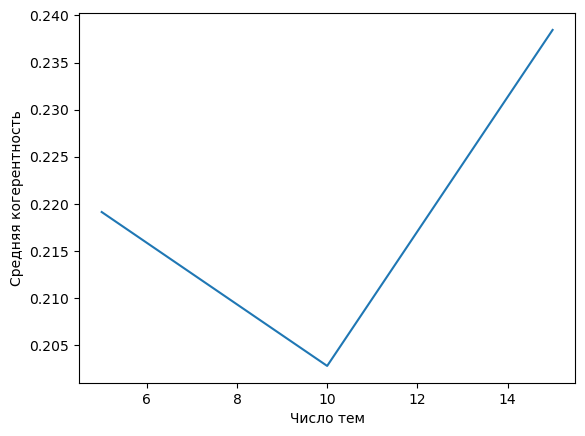

In [39]:
topics_list = [5, 10, 15]
coherences = []

for num in tqdm(topics_list):
    lda = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=num, chunksize=50, update_every=1, passes=2)
    coherences.append(CoherenceModel(model=lda, texts=data['text'], dictionary=dictionary, coherence='c_v').get_coherence())

plt.plot(topics_list, coherences)
plt.xlabel("Число тем")
plt.ylabel("Средняя когерентность")
plt.show()